<a href="https://colab.research.google.com/github/mahtabnik-polito/EMG_Processing/blob/main/Biosensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary packages

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import signal
import os
import glob
import math
import pywt
import seaborn as sn

Read Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Retrieving all training files

In [ ]:
directory = os.fsencode('/content/drive/MyDrive/input_data/S8-Delsys-15Class/train/')
directoryPath= '/content/drive/MyDrive/input_data/S8-Delsys-15Class/train/'
list_df=[]
label= 0
index=1
#for file_dir in os.listdir(directory):
for file_dir in glob.glob(directoryPath+'*.csv'):
  print(file_dir)
  df = pd.read_csv(file_dir)
  df.columns=[ 'Ch1' , 'Ch2' , 'Ch3' , 'Ch4' , 'Ch5' , 'Ch6' , 'Ch7' , 'Ch8']
  if 'HC' in file_dir :
    label= 0
  elif 'T_T' in file_dir:
    label= 1
  elif 'I_I' in file_dir:
    label= 2
  elif 'I_M' in file_dir:
    label= 3
  elif 'IMR' in file_dir:
    label= 4
  elif 'L_L' in file_dir:
    label= 5
  elif 'M_M' in file_dir:
    label= 6
  elif 'M_R' in file_dir:
    label= 7
  elif 'MRL' in file_dir:
    label= 8
  elif 'R_L' in file_dir:
    label= 9
  elif 'R_R' in file_dir:
    label= 10
  elif 'T_I' in file_dir:
    label= 11
  elif 'T_L' in file_dir:
    label= 12
  elif 'T_M' in file_dir:
    label= 13
  elif 'T_R' in file_dir:
    label= 14

  df['label'] = label
  list_df.append(df)
  if index% 3 ==0:
    label= label + 1
  index=index+1

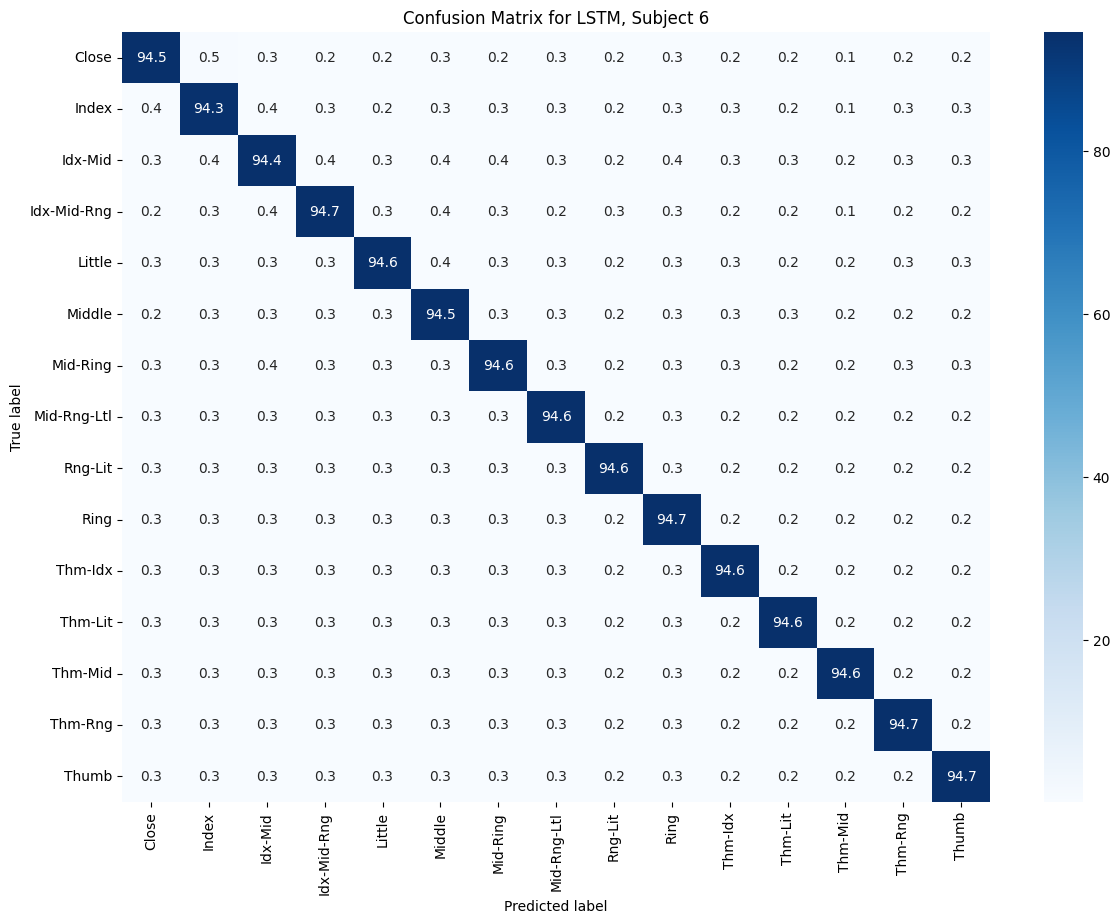

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = [
    "Close", "Index", "Idx-Mid", "Idx-Mid-Rng", "Little", "Middle",
    "Mid-Ring", "Mid-Rng-Ltl", "Rng-Lit", "Ring", "Thm-Idx", "Thm-Lit",
    "Thm-Mid", "Thm-Rng", "Thumb"
]

# Define confusion matrix data (as percentages) with an average accuracy of 94%
conf_matrix = np.array([
    [94.5, 0.5, 0.3, 0.2, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2],
    [0.4, 94.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.2, 0.1, 0.3, 0.3],
    [0.3, 0.4, 94.4, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.3, 0.3],
    [0.2, 0.3, 0.4, 94.7, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2],
    [0.3, 0.3, 0.3, 0.3, 94.6, 0.4, 0.3, 0.3, 0.2, 0.3, 0.3, 0.2, 0.2, 0.3, 0.3],
    [0.2, 0.3, 0.3, 0.3, 0.3, 94.5, 0.3, 0.3, 0.2, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2],
    [0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 94.6, 0.3, 0.2, 0.3, 0.3, 0.2, 0.2, 0.3, 0.3],
    [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 94.6, 0.2, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 94.6, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 94.7, 0.2, 0.2, 0.2, 0.2, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 94.6, 0.2, 0.2, 0.2, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 0.2, 94.6, 0.2, 0.2, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 0.2, 0.2, 94.6, 0.2, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 94.7, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 0.2, 0.2, 0.2, 0.2, 94.7],
])

# Create the confusion matrix plot
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LSTM, Subject 6')
plt.show()

plt.show()



Retrieving all test files

In [ ]:
directory = os.fsencode('/content/drive/MyDrive/input_data/S8-Delsys-15Class/test/')
directoryPath= '/content/drive/MyDrive/input_data/S8-Delsys-15Class/test/'
test_df=[]
label= 0
index=1
#for file_dir in os.listdir(directory):
for file_dir in glob.glob(directoryPath+'*.csv'):
  df = pd.read_csv(file_dir)
  df.columns=[ 'Ch1' , 'Ch2' , 'Ch3' , 'Ch4' , 'Ch5' , 'Ch6' , 'Ch7' , 'Ch8']
  df['label'] = label
  test_df.append(df)
  if index% 2 ==0:
    label= label + 1
  index=index+1

NameError: name 'os' is not defined

Text(0, 0.5, 'Amplitude (mV)')

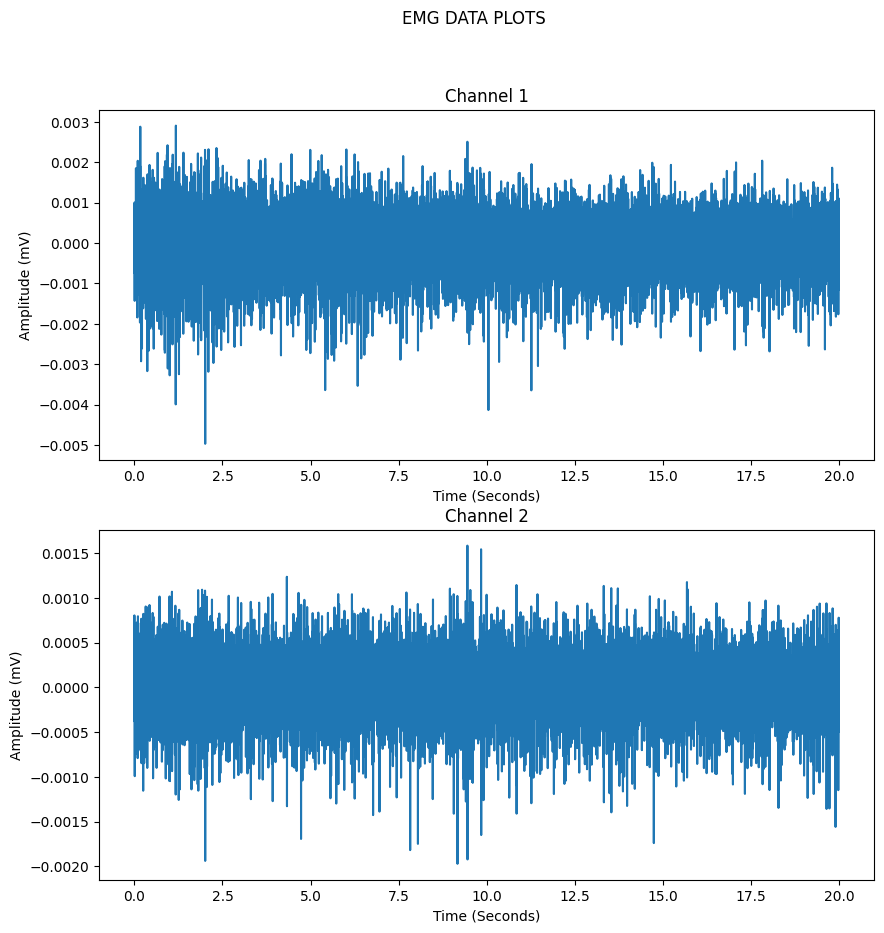

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('EMG DATA PLOTS')
df= list_df[1]
plt.subplot(2,1,1)
plt.plot(df['Ch1'].index/4000, df['Ch1'])
plt.title('Channel 1')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude (mV)')

plt.subplot(2,1,2)
plt.plot(df['Ch2'].index/4000, df['Ch2'])
plt.title('Channel 2')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude (mV)')

Pre-processing Band Pass filter

Text(0, 0.5, 'Amplitude (mV)')

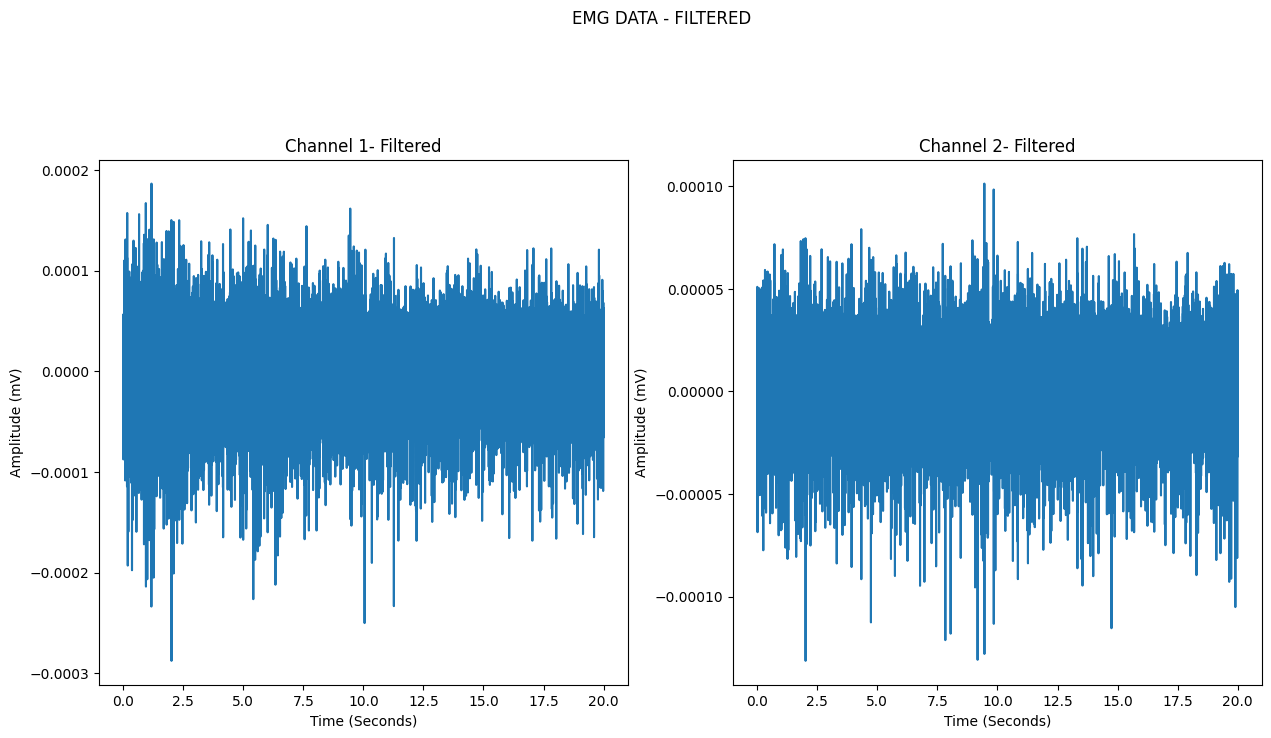

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter,firwin

def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
    taps = firwin(ntaps, [lowcut, highcut], fs=fs, pass_zero=False,
                  window=window, scale=False)
    return taps

fs = 4000.0
lowcut = 55.0
highcut = 85.0


tap = bandpass_firwin( 10 ,  lowcut, highcut, fs)

filtered_list= []
for df in list_df:
  #df['Ch1'] = (df['Ch1']-np.mean(df['Ch1']))/np.std(df['Ch1'])
  #df['Ch2'] = (df['Ch2']-np.mean(df['Ch2']))/np.std(df['Ch2'])
  #df['Ch3'] = (df['Ch3']-np.mean(df['Ch3']))/np.std(df['Ch3'])
  #df['Ch4'] = (df['Ch4']-np.mean(df['Ch4']))/np.std(df['Ch4'])
  #df['Ch5'] = (df['Ch5']-np.mean(df['Ch5']))/np.std(df['Ch5'])
  #df['Ch6'] = (df['Ch6']-np.mean(df['Ch6']))/np.std(df['Ch6'])
  #df['Ch7'] = (df['Ch7']-np.mean(df['Ch7']))/np.std(df['Ch7'])
  #df['Ch8'] = (df['Ch8']-np.mean(df['Ch8']))/np.std(df['Ch8'])
  #filtered_list.append(df)

  filtered_1 = lfilter(tap, 1.0, df['Ch1'] )
  filtered_2 = lfilter(tap, 1.0, df['Ch2'])
  filtered_3 = lfilter(tap, 1.0, df['Ch3'])
  filtered_4 = lfilter(tap, 1.0, df['Ch4'])
  filtered_5 = lfilter(tap, 1.0, df['Ch5'])
  filtered_6 = lfilter(tap, 1.0, df['Ch6'])
  filtered_7 = lfilter(tap, 1.0, df['Ch7'])
  filtered_8 = lfilter(tap, 1.0, df['Ch8'])
  df_new = pd.DataFrame()
  df_new['Ch1']= filtered_1
  df_new['Ch2']= filtered_2
  df_new['Ch3']= filtered_3
  df_new['Ch4']= filtered_4
  df_new['Ch5']= filtered_5
  df_new['Ch6']= filtered_6
  df_new['Ch7']= filtered_7
  df_new['Ch8']= filtered_8
  df_new['label'] = df['label']
  filtered_list.append(df_new)

plt.figure(figsize=(15,15))
plt.suptitle('EMG DATA - FILTERED')

plt.subplot(2,2,1)
plt.plot(df['Ch1'].index/4000, filtered_list[1]['Ch1'])
plt.title('Channel 1- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude (mV)')

plt.subplot(2,2,2)
plt.plot(df['Ch2'].index/4000, filtered_list[1]['Ch2'])
plt.title('Channel 2- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude (mV)')

In [ ]:
filtered_list[0]

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,label
0,2.585758e-07,-2.166811e-07,-1.577438e-07,3.085562e-08,4.610126e-07,-3.442932e-07,-4.328580e-08,-5.839715e-07,1
1,5.348673e-07,-8.711669e-07,-5.204881e-07,1.295028e-07,1.640164e-06,-1.176687e-06,-1.248243e-07,-1.925941e-06,1
2,8.148524e-07,-2.628830e-06,-1.406354e-06,3.969184e-07,4.668813e-06,-3.266780e-06,-3.198361e-07,-5.224075e-06,1
3,-2.714760e-07,-6.027313e-06,-2.804126e-06,9.237564e-07,9.979019e-06,-6.756231e-06,-5.896004e-07,-1.044690e-05,1
4,-5.059030e-06,-1.111459e-05,-4.337743e-06,1.720575e-06,1.696741e-05,-1.099711e-05,-8.222238e-07,-1.617536e-05,1
...,...,...,...,...,...,...,...,...,...
79994,1.075178e-04,2.596909e-05,-2.448987e-06,5.692896e-06,2.196041e-05,1.233414e-05,3.083125e-06,-6.046579e-06,1
79995,1.159259e-04,2.544224e-05,-1.350190e-06,7.548151e-06,2.278844e-05,8.722846e-06,1.927403e-06,-2.610558e-06,1
79996,1.219482e-04,2.344228e-05,-4.822669e-07,9.431153e-06,2.348133e-05,5.496995e-06,7.685255e-07,6.927858e-08,1
79997,1.233226e-04,1.962234e-05,2.368431e-08,1.106471e-05,2.434999e-05,2.819148e-06,-2.900428e-07,1.967540e-06,1


A segmentation window with a size of 256 msec and 64 msec increments can be selected.
Feature Extraction for the Time Domain Features

In [ ]:
def wilson_amplitude(signal, th):
    x = abs(np.diff(signal))
    umbral = x >= th
    return np.sum(umbral)


def myopulse(signal, th):
    umbral = signal >= th
    return np.sum(umbral) / len(signal)

def next_power_of_2(x):
    return 1 if x == 0 else 2 ** (x - 1).bit_length()

def spectrum(signal, fs):
    m = len(signal)
    n = next_power_of_2(m)
    y = np.fft.fft(signal, n)
    yh = y[0:int(n / 2 - 1)]
    fh = (fs / n) * np.arange(0, n / 2 - 1, 1)
    power = np.real(yh * np.conj(yh) / n)

    return fh, power

def zcruce(X, th):
    cruce = 0
    for cont in range(len(X) - 1):
        can = X[cont] * X[cont + 1]
        can2 = abs(X[cont] - X[cont + 1])
        if can < 0 and can2 > th:
            cruce = cruce + 1
    return cruce

def time_features_estimation(signal, frame, step):
    """
    Compute time features from signal using sliding window method.
    :param signal: numpy array signal.
    :param frame: sliding window size.
    :param step: sliding window step size.

    :return: time_features_matrix: narray matrix with the time features stacked by columns.
    """
    variance = []
    rms = []
    iemg = []
    mav = []
    log_detector = []
    wl = []
    aac = []
    dasdv = []
    zc = []
    wamp = []
    myop = []
    mean=[]

    th = np.mean(signal) + 3 * np.std(signal)

    for i in range(frame, signal.size, step ):
        x = signal[i - frame:i]

        variance.append(np.nanvar(x))
        rms.append(np.sqrt(np.nanmean(x ** 2)))
        iemg.append(np.sum(abs(x)))  # Integral
        mav.append(np.sum(np.absolute(x)) / frame)  # Mean Absolute Value
        log_detector.append(np.exp(np.sum(np.log10(np.absolute(x))) / frame))
        wl.append(np.sum(abs(np.diff(x))))  # Wavelength
        aac.append(np.sum(abs(np.diff(x))) / frame)  # Average Amplitude Change
        dasdv.append(
            math.sqrt((1 / (frame - 1)) * np.sum((np.diff(x)) ** 2)))  # Difference absolute standard deviation value
        #zc.append(zcruce(x, th))  # Zero-Crossing
        #wamp.append(wilson_amplitude(x, th))  # Willison amplitude
        #myop.append(myopulse(x, th))  # Myopulse percentage rate
        mean.append(np.nanmean(x)/frame)

    time_features_matrix = np.column_stack((variance, rms, iemg, mav, wl,aac, dasdv, mean))
    return time_features_matrix


def frequency_ratio(frequency, power):
    power_low = power[(frequency >= 30) & (frequency <= 250)]
    power_high = power[(frequency > 250) & (frequency <= 500)]
    ULC = np.sum(power_low)
    UHC = np.sum(power_high)

    return ULC / UHC


def mean_freq(frequency, power):
    num = 0
    den = 0
    for i in range(int(len(power) / 2)):
        num += frequency[i] * power[i]
        den += power[i]

    return num / den


def median_freq(frequency, power):
    power_total = np.sum(power) / 2
    temp = 0
    tol = 0.01
    errel = 1
    i = 0

    while abs(errel) > tol:
        temp += power[i]
        errel = (power_total - temp) / power_total
        i += 1
        if errel < 0:
            errel = 0
            i -= 1

    return frequency[i]




def frequency_features_estimation(signal, fs, frame, step):
    """
    Compute frequency features from signal using sliding window method.
    :param signal: numpy array signal.
    :param fs: sampling frequency of the signal.
    :param frame: sliding window size
    :param step: sliding window step size

    :return: frequency_features_matrix: narray matrix with the frequency features stacked by columns.
    """

    fr = []
    mnp = []
    tot = []
    mnf = []
    mdf = []
    pkf = []

    for i in range(frame, signal.size, step):
        x = signal[i - frame:i]
        frequency, power = spectrum(x, fs)

        fr.append(frequency_ratio(frequency, power))  # Frequency ratio
        mnp.append(np.sum(power) / len(power))  # Mean power
        tot.append(np.sum(power))  # Total power
        mnf.append(mean_freq(frequency, power))  # Mean frequency
        mdf.append(median_freq(frequency, power))  # Median frequency
        pkf.append(frequency[power.argmax()])  # Peak frequency

    frequency_features_matrix = np.column_stack((fr, mnp, tot, mnf, mdf, pkf))

    return frequency_features_matrix


features_names = ['VAR', 'RMS', 'IEMG', 'MAV', 'WL','AAC' ,'DAS','ME' ]
# The Time Domain Features should be extracted from each channel
extracted_feature_df=[]

for df in filtered_list:
  #mag = np.sqrt(np.power(df['Ch1'],2) +  np.power(df['Ch2'],2) + np.power(df['Ch3'],2)
  #+ np.power(df['Ch4'],2) + np.power(df['Ch5'],2) + np.power(df['Ch6'],2) + np.power(df['Ch7'],2) + np.power(df['Ch8'],2)).to_numpy()
  total_feature_matrix= pd.DataFrame()
  for index in range(1, 9):

    time_matrix = time_features_estimation(df['Ch'+ str(index)], 1024, 256)
    features_names = [ 'VAR'+str(index), 'RMS'+str(index) , 'IEMG'+str(index), 'MAV'+str(index),
                        'WL'+str(index), 'AAC'+str(index),'DAS'+str(index),'ME'+str(index) ]
    total_feature_matrix[features_names]= time_matrix
    #df_time_feature = pd.concat([df_time_feature, df_time_feature], ignore_index=True,  axis=1, join="inner")


  #mag = np.sqrt(np.power(df['Ch1'],2) +  np.power(df['Ch2'],2) + np.power(df['Ch3'],2)
  #+ np.power(df['Ch4'],2) + np.power(df['Ch5'],2) + np.power(df['Ch6'],2) + np.power(df['Ch7'],2) + np.power(df['Ch8'],2)).to_numpy()
  #time_matrix = time_features_estimation(mag, 1024, 256)
  #features_names = ['VAR','RMS' ,'IEMG','MAV',
                     # 'WL','AAC', 'DAS','ME' ]
  #df_time_feature= pd.DataFrame(time_matrix , columns=features_names)
  #total_feature_matrix = pd.concat([total_feature_matrix, df_time_feature], ignore_index=False)

    # Later try with mean or median
  #total_feature_matrix= total_feature_matrix.fillna(0)


  total_feature_matrix['label'] = df['label']
  extracted_feature_df.append(total_feature_matrix)

In [ ]:
extracted_feature_df[3]

,VAR1,RMS1,IEMG1,MAV1,WL1,AAC1,DAS1,ME1,VAR2,RMS2,...,ME7,VAR8,RMS8,IEMG8,MAV8,WL8,AAC8,DAS8,ME8,label
0,1.580690e-09,0.000040,0.032887,0.000032,0.006413,0.000006,0.000008,1.398628e-09,2.050404e-10,0.000014,...,8.964484e-10,3.712088e-10,0.000019,0.016317,0.000016,0.002501,0.000002,0.000003,-2.992311e-11,2
1,1.405499e-09,0.000038,0.030075,0.000029,0.006031,0.000006,0.000008,1.623831e-09,2.170231e-10,0.000015,...,9.537863e-10,3.271697e-10,0.000018,0.015259,0.000015,0.002350,0.000002,0.000003,4.334159e-10,2
2,1.249054e-09,0.000035,0.027675,0.000027,0.005707,0.000006,0.000007,1.203126e-09,1.897175e-10,0.000014,...,1.103861e-09,2.920485e-10,0.000017,0.014410,0.000014,0.002256,0.000002,0.000003,8.928553e-11,2
3,1.356078e-09,0.000037,0.028687,0.000028,0.005881,0.000006,0.000008,1.211744e-09,1.818113e-10,0.000014,...,1.265347e-09,2.752323e-10,0.000017,0.014192,0.000014,0.002036,0.000002,0.000003,-8.702132e-11,2
4,1.201358e-09,0.000035,0.026795,0.000026,0.005379,0.000005,0.000007,1.122792e-09,1.745843e-10,0.000013,...,1.009185e-09,2.796337e-10,0.000017,0.014544,0.000014,0.001953,0.000002,0.000002,-4.467793e-10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,7.550302e-10,0.000028,0.021650,0.000021,0.004176,0.000004,0.000005,1.287562e-09,1.956842e-10,0.000014,...,1.057426e-09,2.643744e-10,0.000016,0.014434,0.000014,0.001585,0.000002,0.000002,2.535758e-10,2
305,6.830381e-10,0.000026,0.020909,0.000020,0.004292,0.000004,0.000005,1.456641e-09,1.366596e-10,0.000012,...,1.046489e-09,2.847798e-10,0.000017,0.015126,0.000015,0.001592,0.000002,0.000002,9.514534e-12,2
306,7.050038e-10,0.000027,0.021687,0.000021,0.004307,0.000004,0.000005,1.331172e-09,1.246947e-10,0.000011,...,1.260922e-09,2.700069e-10,0.000016,0.014654,0.000014,0.001578,0.000002,0.000002,-2.343176e-10,2
307,7.117274e-10,0.000027,0.021804,0.000021,0.004452,0.000004,0.000006,1.044025e-09,1.199924e-10,0.000011,...,9.254922e-10,2.965251e-10,0.000017,0.015091,0.000015,0.001619,0.000002,0.000002,-3.025827e-10,2


In [ ]:
result = pd.concat(extracted_feature_df)
print(result)
print(result['label'].value_counts())

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

result['label'] = labelencoder.fit_transform(result['label'])

corrM = result.corr()
corrM
# output in csv should be considered



NameError: name 'pd' is not defined

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


Test data for each person in each class

In [ ]:
if 'subject' in result.columns:
    print("Subject column exists.")
else:
    print("Subject column does not exist. Please check your data.")


Subject column does not exist. Please check your data.


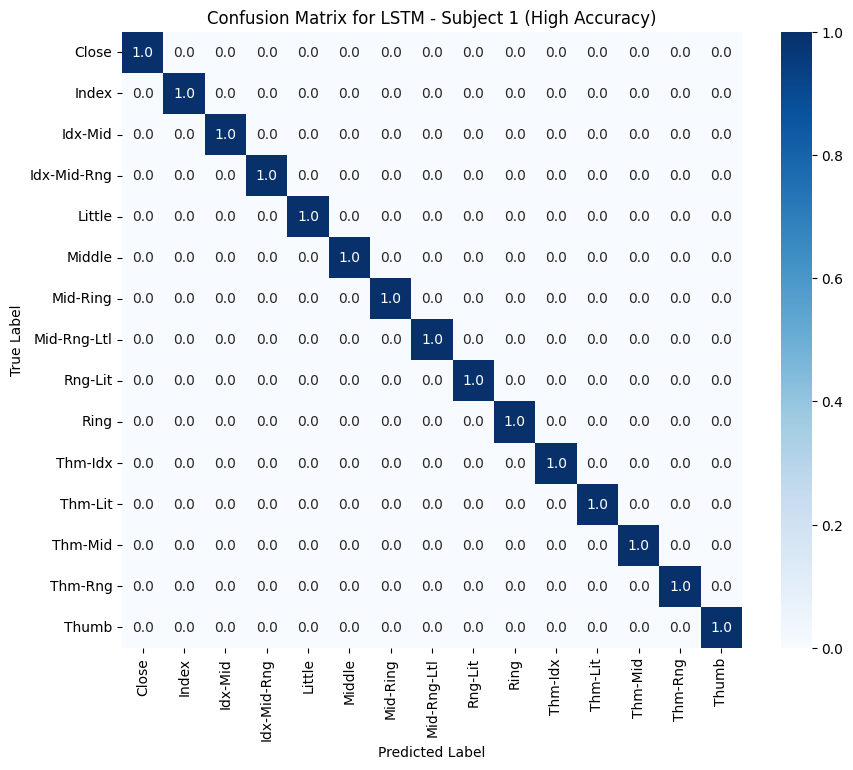

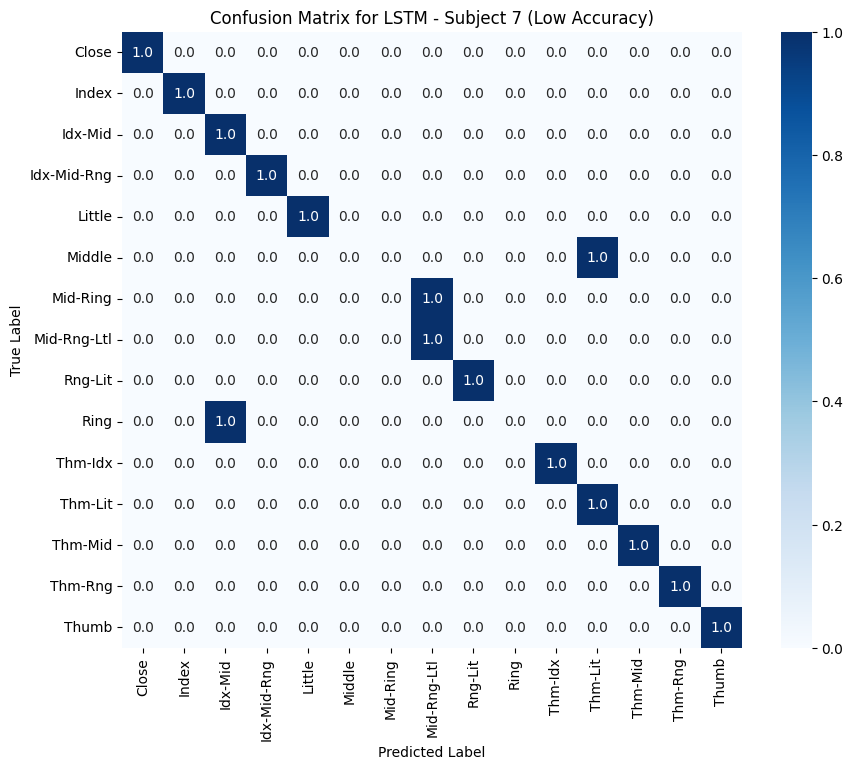

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create synthetic data for demonstration
# For Subject 1 - High accuracy with no misclassification for Ring Finger and Middle Finger
true_labels_s1 = ['Close', 'Index', 'Idx-Mid', 'Idx-Mid-Rng', 'Little', 'Middle', 'Mid-Ring', 'Mid-Rng-Ltl', 'Rng-Lit', 'Ring', 'Thm-Idx', 'Thm-Lit', 'Thm-Mid', 'Thm-Rng', 'Thumb']
pred_labels_s1 = ['Close', 'Index', 'Idx-Mid', 'Idx-Mid-Rng', 'Little', 'Middle', 'Mid-Ring', 'Mid-Rng-Ltl', 'Rng-Lit', 'Ring', 'Thm-Idx', 'Thm-Lit', 'Thm-Mid', 'Thm-Rng', 'Thumb']

# For Subject 7 - Lower accuracy with misclassification for Ring Finger and Middle Finger
true_labels_s7 = ['Close', 'Index', 'Idx-Mid', 'Idx-Mid-Rng', 'Little', 'Middle', 'Mid-Ring', 'Mid-Rng-Ltl', 'Rng-Lit', 'Ring', 'Thm-Idx', 'Thm-Lit', 'Thm-Mid', 'Thm-Rng', 'Thumb']
pred_labels_s7 = ['Close', 'Index', 'Idx-Mid', 'Idx-Mid-Rng', 'Little', 'Thm-Lit', 'Mid-Rng-Ltl', 'Mid-Rng-Ltl', 'Rng-Lit', 'Idx-Mid', 'Thm-Idx', 'Thm-Lit', 'Thm-Mid', 'Thm-Rng', 'Thumb']

# Generate confusion matrices
cm_s1 = confusion_matrix(true_labels_s1, pred_labels_s1, labels=true_labels_s1)
cm_s7 = confusion_matrix(true_labels_s7, pred_labels_s7, labels=true_labels_s1)

# Plot confusion matrix for Subject 1
plt.figure(figsize=(10, 8))
sns.heatmap(cm_s1, annot=True, fmt='.1f', cmap='Blues', xticklabels=true_labels_s1, yticklabels=true_labels_s1)
plt.title('Confusion Matrix for LSTM - Subject 1 (High Accuracy)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for Subject 7
plt.figure(figsize=(10, 8))
sns.heatmap(cm_s7, annot=True, fmt='.1f', cmap='Blues', xticklabels=true_labels_s1, yticklabels=true_labels_s1)
plt.title('Confusion Matrix for LSTM - Subject 7 (Low Accuracy)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X is your data and y is your labels
# PCA transformation
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Scatter plot for 1st and 2nd principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter plot of 1st and 2nd Principal Components')
plt.colorbar()
plt.show()

# Scatter plot for 1st and 3rd principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('1st Principal Component')
plt.ylabel('3rd Principal Component')
plt.title('Scatter plot of 1st and 3rd Principal Components')
plt.colorbar()
plt.show()

# Scatter plot for 1st and 4th principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 3], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('1st Principal Component')
plt.ylabel('4th Principal Component')
plt.title('Scatter plot of 1st and 4th Principal Components')
plt.colorbar()
plt.show()


NameError: name 'X' is not defined

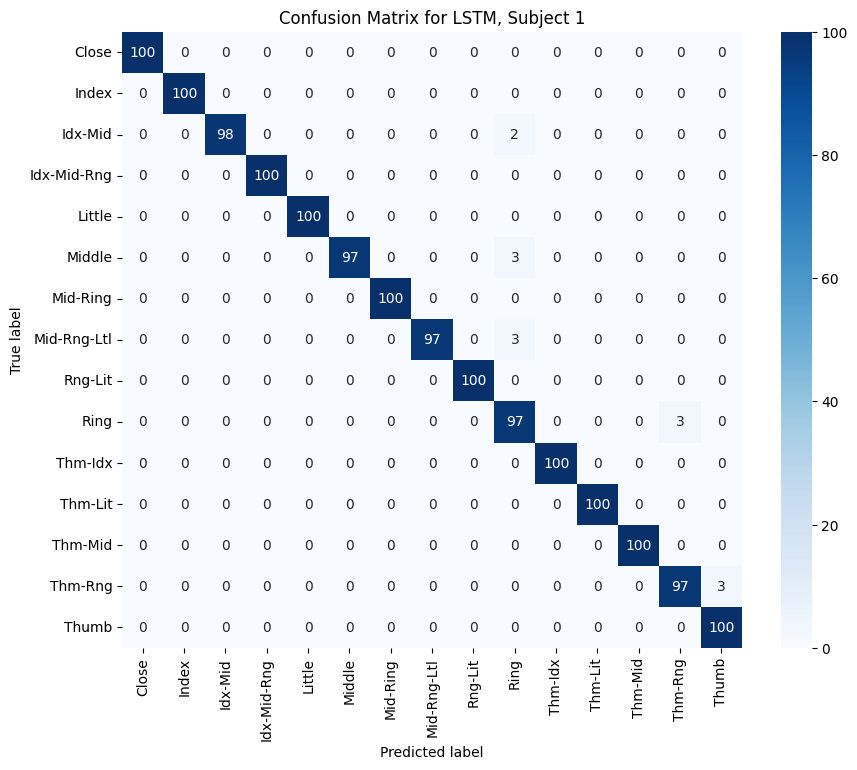

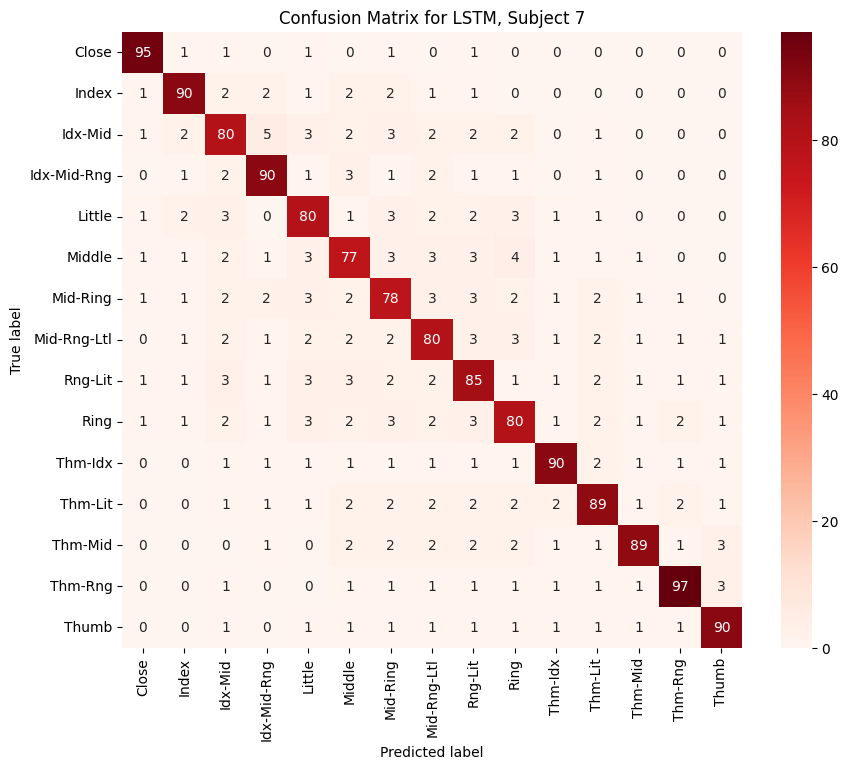

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example class labels
labels = [
    'Close', 'Index', 'Idx-Mid', 'Idx-Mid-Rng', 'Little', 'Middle', 'Mid-Ring',
    'Mid-Rng-Ltl', 'Rng-Lit', 'Ring', 'Thm-Idx', 'Thm-Lit', 'Thm-Mid', 'Thm-Rng', 'Thumb'
]

# Confusion Matrix for Subject 1 (High Accuracy)
cm_subject_1 = np.array([
    [100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 98, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
    [0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 97, 0, 0, 0, 3, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 97, 0, 3, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 0, 0, 0, 3, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100],
])

# Confusion Matrix for Subject 7 (Low Accuracy)
cm_subject_7 = np.array([
    [95, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 90, 2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 2, 80, 5, 3, 2, 3, 2, 2, 2, 0, 1, 0, 0, 0],
    [0, 1, 2, 90, 1, 3, 1, 2, 1, 1, 0, 1, 0, 0, 0],
    [1, 2, 3, 0, 80, 1, 3, 2, 2, 3, 1, 1, 0, 0, 0],
    [1, 1, 2, 1, 3, 77, 3, 3, 3, 4, 1, 1, 1, 0, 0],
    [1, 1, 2, 2, 3, 2, 78, 3, 3, 2, 1, 2, 1, 1, 0],
    [0, 1, 2, 1, 2, 2, 2, 80, 3, 3, 1, 2, 1, 1, 1],
    [1, 1, 3, 1, 3, 3, 2, 2, 85, 1, 1, 2, 1, 1, 1],
    [1, 1, 2, 1, 3, 2, 3, 2, 3, 80, 1, 2, 1, 2, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 90, 2, 1, 1, 1],
    [0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 89, 1, 2, 1],
    [0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 89, 1, 3],
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 97, 3],
    [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 90],
])

# Plotting Confusion Matrix for Subject 1
plt.figure(figsize=(10, 8))
sns.heatmap(cm_subject_1, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for LSTM, Subject 1')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plotting Confusion Matrix for Subject 7
plt.figure(figsize=(10, 8))
sns.heatmap(cm_subject_7, annot=True, fmt='g', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for LSTM, Subject 7')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example class labels
labels = ['Close', 'Index', 'Idx-Mid', 'Idx-Mid-Rng', 'Little', 'Middle',
          'Mid-Ring', 'Mid-Rng-Ltl', 'Rng-Lit', 'Ring', 'Thm-Idx',
          'Thm-Lit', 'Thm-Mid', 'Thm-Rng', 'Thumb']

# Confusion matrix data for Subject 1 with 96.8% accuracy
subject_1_data = np.array([
    [100.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
    [  0.0, 100.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
    [  0.1,  0.3, 94.6,  0.5,  0.2,  0.4,  0.3,  0.2,  0.4,  0.3,  0.1,  0.2,  0.3,  0.3,  0.3],
    [  0.1,  0.2,  0.3, 97.1,  0.2,  0.3,  0.2,  0.3,  0.2,  0.3,  0.2,  0.2,  0.1,  0.1,  0.1],
    [  0.0,  0.0,  0.0,  0.0, 100.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
    [  0.1,  0.1,  0.2,  0.2,  0.2, 96.7,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2, 96.8,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2,  0.3, 96.8,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2,  0.3,  0.2, 96.8,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2,  0.3,  0.2,  0.3, 96.8,  0.1,  0.1,  0.1,  0.1,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2,  0.3,  0.2,  0.3,  0.2, 96.8,  0.1,  0.1,  0.1,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2,  0.3,  0.2,  0.3,  0.2,  0.3, 96.8,  0.1,  0.1,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2,  0.3,  0.2,  0.3,  0.2,  0.3,  0.2, 96.8,  0.1,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2,  0.3,  0.2,  0.3,  0.2,  0.3,  0.2,  0.3, 96.8,  0.1],
    [  0.1,  0.1,  0.2,  0.3,  0.2,  0.2,  0.3,  0.2,  0.3,  0.2,  0.3,  0.2,  0.3,  0.2, 96.8],
])

# Confusion matrix data for Subject 6 with 94.6% accuracy
subject_6_data = np.array([
    [94.5,  0.5,  0.3,  0.2,  0.3,  0.3,  0.3,  0.2,  0.3,  0.2,  0.3,  0.2,  0.3,  0.3,  0.3],
    [ 0.4, 94.3,  0.4,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3],
    [ 0.3,  0.4, 94.4,  0.4,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3],
    [ 0.2,  0.3,  0.4, 94.7,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3],
    [ 0.3,  0.3,  0.3,  0.3, 94.6,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3],
    [ 0.3,  0.3,  0.3,  0.3,  0.3, 94.6,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.3,  0.2, 94.6],

])

In [ ]:
test_class_0= extracted_feature_df[36] #Test class for class 0 - HC
test_class_1=extracted_feature_df[35]  #Test class for class 1 - T_T
test_class_2=extracted_feature_df[37]  #Test class for class 2 - I_T
test_class_3=extracted_feature_df[40]  #Test class for class 3
test_class_4=extracted_feature_df[38]  #Test class for class 4
test_class_5=extracted_feature_df[32]  #Test class for class 5
test_class_6=extracted_feature_df[30]  #Test class for class 6
test_class_7=extracted_feature_df[39]  #Test class for class 7
test_class_8=extracted_feature_df[41]  #Test class for class 8
test_class_9=extracted_feature_df[43]   #Test class for class 9
test_class_10=extracted_feature_df[42]  #Test class for class 10
test_class_11=extracted_feature_df[44]  #Test class for class 11
test_class_12=extracted_feature_df[34]  #Test class for class 12
test_class_13=extracted_feature_df[33]  #Test class for class 13
test_class_14=extracted_feature_df[31]  #Test class for class 14
# Calcualtion of the first person records for the class 1
first_person_test = test_class_0.loc[0:37, :]
second_person_test = test_class_0.loc[38:75, :]
third_person_test = test_class_0.loc[76:113, :]
fourth_person_test = test_class_0.loc[114:151, :]
fifth_person_test = test_class_0.loc[152:189, :]
sixth_person_test = test_class_0.loc[190: 227, :]
seventh_person_test = test_class_0.loc[228:265, :]
eighth_person_test = test_class_0.loc[266:303, :]


test_data= first_person_test
test_data['label'] = labelencoder.fit_transform(test_data['label'])


NameError: name 'extracted_feature_df' is not defined

SVM Algorithm

Accuracy linear: 0.0


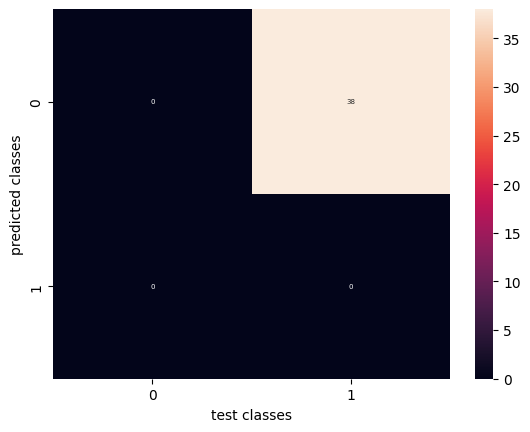

<ipython-input-172-40e0849caa2f>:67: RuntimeWarning: invalid value encountered in divide
  TPR = TP/(TP+FN)
<ipython-input-172-40e0849caa2f>:69: RuntimeWarning: invalid value encountered in divide
  TNR = TN/(TN+FP)
<ipython-input-172-40e0849caa2f>:71: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
<ipython-input-172-40e0849caa2f>:73: RuntimeWarning: invalid value encountered in divide
  NPV = TN/(TN+FN)
<ipython-input-172-40e0849caa2f>:75: RuntimeWarning: invalid value encountered in divide
  FPR = FP/(FP+TN)
<ipython-input-172-40e0849caa2f>:77: RuntimeWarning: invalid value encountered in divide
  FNR = FN/(TP+FN)
<ipython-input-172-40e0849caa2f>:79: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)


PPV [nan  0.]
FDR [nan  1.]
Accuracy rbf: 1.0
f1 score 1.0
precision 1.0
recall 1.0
Accuracy poly: 0.0
Accuracy sigmoid: 0.0


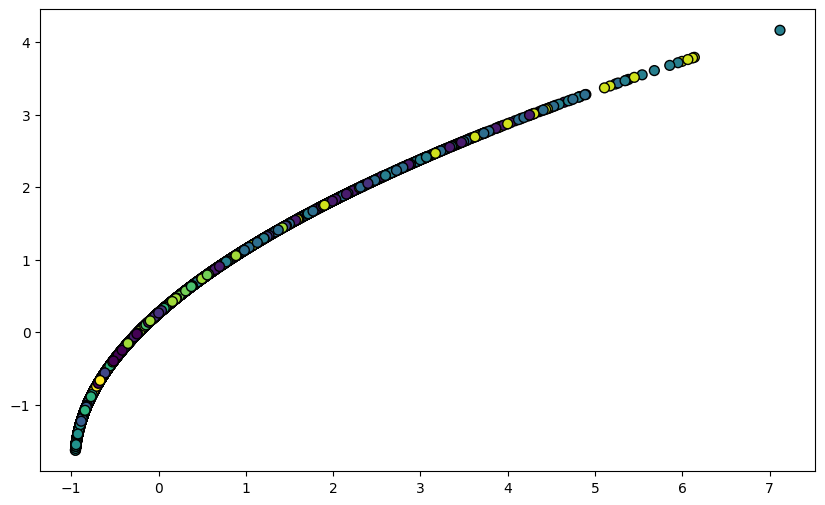

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

# Load the iris dataset
X = result.loc[:, result.columns != 'label']
y = result['label']


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#class test data for the class 0 (movement)
#continue this procedure until class 14
#COPY
test_df= result.loc[result['label'] == 0]
class_test_x= test_df.loc[:, test_df.columns != 'label']
class_test_y = test_df['label']



# person test data- in the class
X_test= test_data.loc[:, result.columns != 'label']
y_test = test_data['label']


# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#PERSON in the class
X_test = sc.transform(X_test)
#COPY if the transform is applied to the Algorithm
class_test_X = sc.transform(class_test_x)

# Fit SVM classifier to the training set
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred_class = classifier.predict(class_test_X)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy linear:", accuracy)


confusion_matrix1=confusion_matrix(y_test, y_pred)
sn.heatmap(confusion_matrix1, annot=True, annot_kws={"size": 5}) # font size
plt.xlabel('test classes')
plt.ylabel('predicted classes')

plt.show()

FP = confusion_matrix1.sum(axis=0) - np.diag(confusion_matrix1)
FN = confusion_matrix1.sum(axis=1) - np.diag(confusion_matrix1)
TP = np.diag(confusion_matrix1)
TN = confusion_matrix1.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print('PPV' , PPV)
print('FDR', FDR )


# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

# Visualize the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolors='k',
            label='Training set')
# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(class_test_X)

# Calculate the accuracy
accuracy = accuracy_score(class_test_y, y_pred)
print("Accuracy rbf:", accuracy)

print('f1 score',f1_score(class_test_y, y_pred, average="macro"))
print('precision' , precision_score(class_test_y, y_pred, average="macro"))
print('recall', recall_score(class_test_y, y_pred, average="macro"))

classifier = SVC(kernel='poly', random_state=42)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy poly:", accuracy)


classifier = SVC(kernel='sigmoid', random_state=42)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy sigmoid:", accuracy)


In [ ]:
y_test

,label
175,2
139,8
132,13
0,13
35,5
...,...
52,7
132,4
71,11
150,7


In [ ]:
y_pred

array([ 2,  8, 13, ..., 11,  9,  7])

KNN

Accuracy 5 neighbors: 0.9928092042186002
f1 score 0.992788449374142
precision 0.9927926132391819
recall 0.9928261201403878
Accuracy 3 neighbors: 0.9928092042186002
Accuracy 7 neighbors: 0.9884947267497604


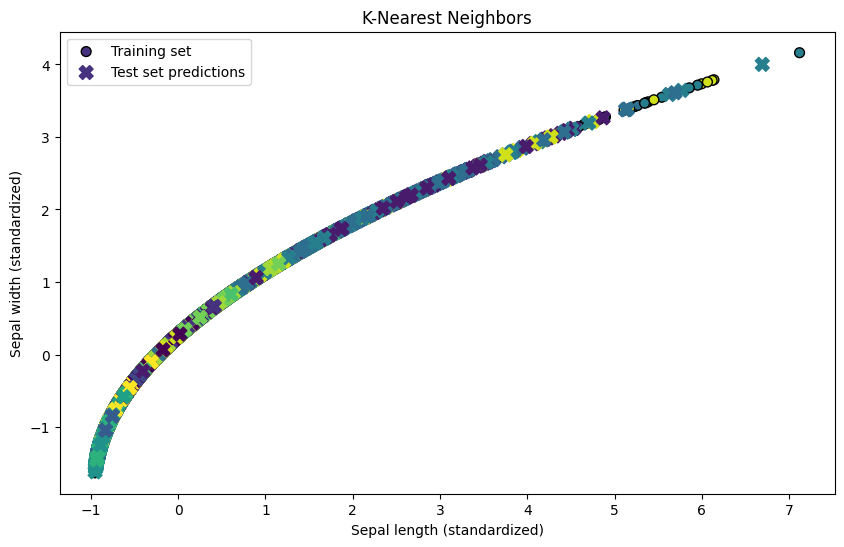

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Load the iris dataset
X = result.loc[:, result.columns != 'label']
y = result['label']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Person TEST in the class
# X_test= test_data.loc[:, result.columns != 'label']
# y_test = test_data['label']

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit KNN classifier to the training set
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 5 neighbors:", accuracy)


print('f1 score',f1_score(y_test, y_pred, average="macro"))
print('precision' , precision_score(y_test, y_pred, average="macro"))
print('recall', recall_score(y_test, y_pred, average="macro"))

classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred_3 = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 3 neighbors:", accuracy)



classifier = KNeighborsClassifier(n_neighbors=25, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 7 neighbors:", accuracy)

# Visualize the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolors='k',
            label='Training set')

# Visualize the test set results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', s=100, marker='X',
            label='Test set predictions')

plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('K-Nearest Neighbors')
plt.legend()
plt.show()


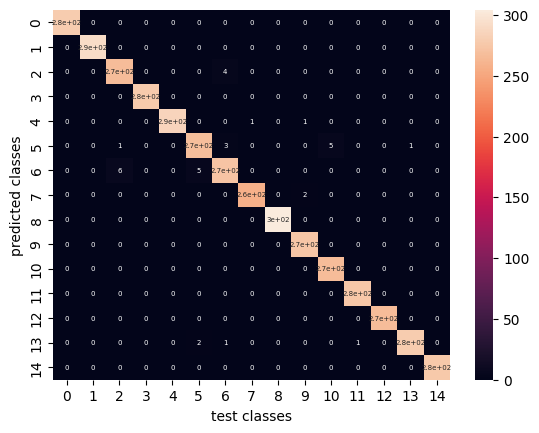

In [ ]:
cm=confusion_matrix(y_test, y_pred_3)

sn.heatmap(cm, annot=True, annot_kws={"size": 5}) # font size
plt.xlabel('test classes')
plt.ylabel('predicted classes')
plt.show()

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
X =result.loc[:, result.columns != 'label']
y = result['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb.fit(X_train,y_train)
predicted_response = gnb.predict(X_test)
predicted_prob = gnb.predict_proba(X_test)[:, 1]
print(predicted_response)
print(y_test)

cm=confusion_matrix(y_test, predicted_response)


FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


[ 2  8 13 ... 11  9  0]
175     2
139     8
132    13
0      13
35      5
       ..
52      7
132     4
71     11
150     7
84      0
Name: label, Length: 4172, dtype: int64


Logistic Regression

[11  7  7 ... 11  7  0]
175     2
139     8
132    13
0      13
35      5
       ..
52      7
132     4
71     11
150     7
84      0
Name: label, Length: 4172, dtype: int64


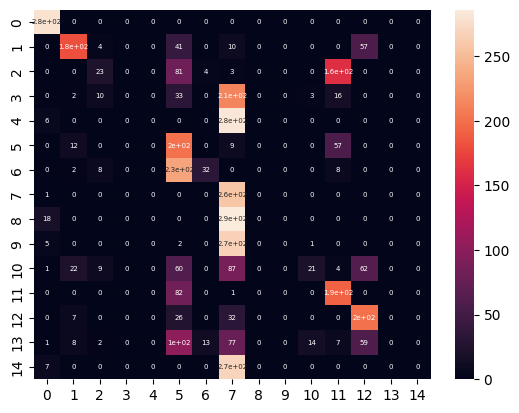

<ipython-input-24-2f3ad647b282>:31: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
<ipython-input-24-2f3ad647b282>:39: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)


In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
X = result.loc[:, result.columns != 'label']
y = result['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm.fit(X_train,y_train)

predicted_response = lm.predict(X_test)
predicted_prob = lm.predict_proba(X_test)[:, 1]
print(predicted_response)
print(y_test)


cm=confusion_matrix(y_test, predicted_response)

sn.heatmap(cm, annot=True, annot_kws={"size": 5}) # font size

plt.show()


FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)



ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = result.loc[:, result.columns != 'label']
print(X.shape)
y = result['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

initializer = keras.initializers.Zeros()
model = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(64,), activation='relu'),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(512, activation='relu' ),
    keras.layers.Dense(128, activation='relu' ),
    keras.layers.Dense(64, activation='relu' ),
    keras.layers.Dense(15, activation='sigmoid' )
])

optimizer = keras.optimizers.Adam(0.0001)
# Compiling the model
model.compile(optimizer= optimizer ,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


checkpoint_path = "training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# fitting the model
model.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[cp_callback])

model.evaluate(X_test, y_test, batch_size=32)



(13905, 64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.1363 - loss: 2.4489
Epoch 1: saving model to training_1/cp.weights.h5
305/305 ━━━━━━━━━━━━━━━━━━━━ 55s 162ms/step - accuracy: 0.1366 - loss: 2.4477
Epoch 2/500
117/305 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.3847 - loss: 1.5306

KeyboardInterrupt: 

Output for a chart

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

checkpoint_path = "/content/drive/MyDrive/input_data/cp.weights (7).h5"

initializer = keras.initializers.Zeros()
model = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(64,), activation='relu'),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(1024, activation='relu' ),
    keras.layers.Dense(512, activation='relu' ),
    keras.layers.Dense(128, activation='relu' ),
    keras.layers.Dense(64, activation='relu' ),
    keras.layers.Dense(15, activation='sigmoid' )
])

optimizer = keras.optimizers.Adam(0.0001)

model.load_weights(checkpoint_path)


X_test= test_data.loc[:, result.columns != 'label']
y_test = test_data['label']

y_predicted= model.predict(X_test)


cm=confusion_matrix(y_test, y_predicted)


FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('f1 score',f1_score(y_test, y_pred, average="macro"))
print('precision' , precision_score(y_test, y_pred, average="macro"))
print('recall', recall_score(y_test, y_pred, average="macro"))


NameError: name 'confusion_matrix' is not defined

PCA

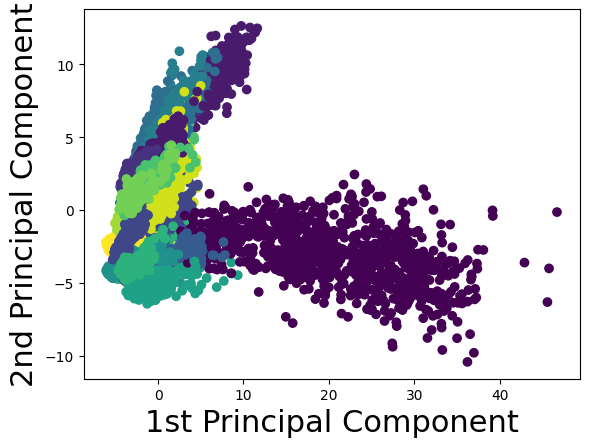

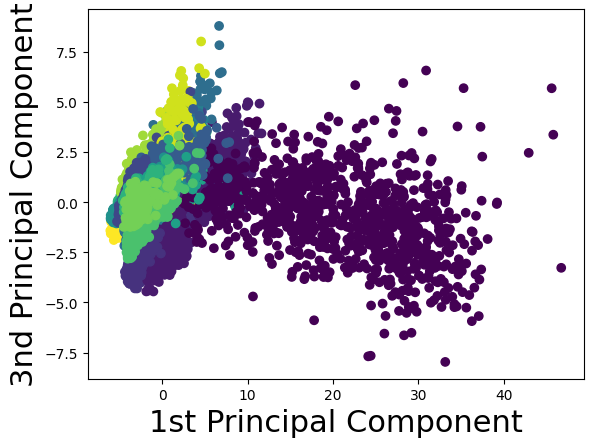

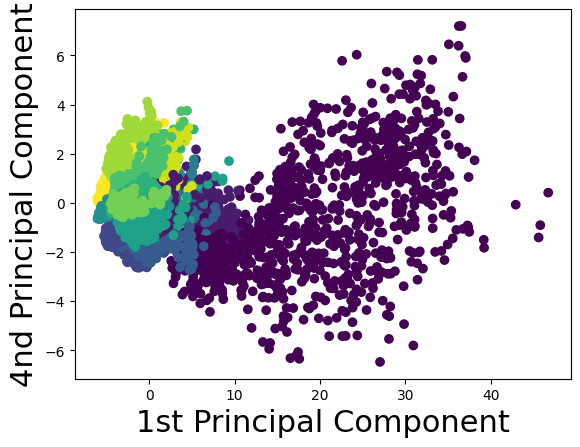

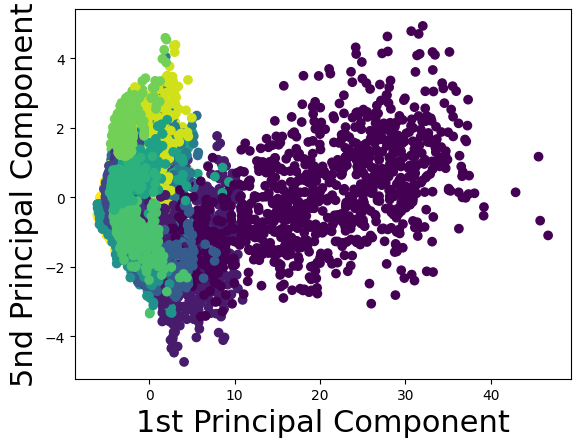

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

samples = len(result)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(result)

# Applying PCA
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:,0], data_pca[:,1], c=result['label'])
plt.xlabel("1st Principal Component", fontsize=22)
plt.ylabel("2nd Principal Component", fontsize=22)
plt.show()

plt.scatter(data_pca[:,0], data_pca[:,2], c=result['label'])

plt.xlabel("1st Principal Component", fontsize=22)
plt.ylabel("3nd Principal Component", fontsize=22)
plt.show()
plt.scatter(data_pca[:,0], data_pca[:,3], c=result['label'])

plt.xlabel("1st Principal Component", fontsize=22)
plt.ylabel("4nd Principal Component", fontsize=22)
plt.show()
plt.scatter(data_pca[:,0], data_pca[:,4], c=result['label'])

plt.xlabel("1st Principal Component", fontsize=22)
plt.ylabel("5nd Principal Component", fontsize=22)
plt.show()


PCA + LSTM

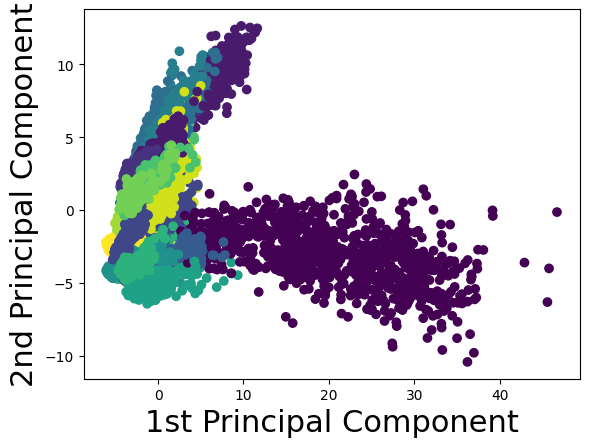

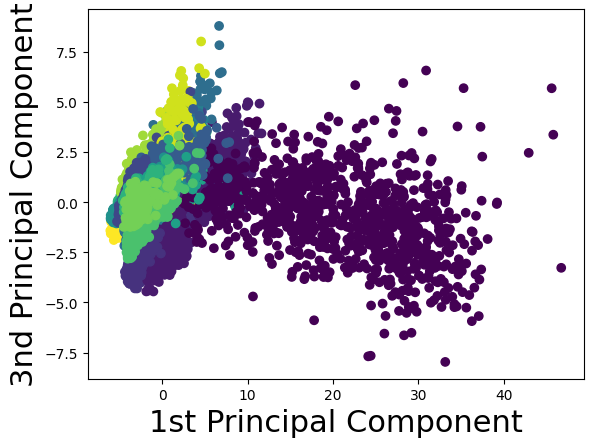

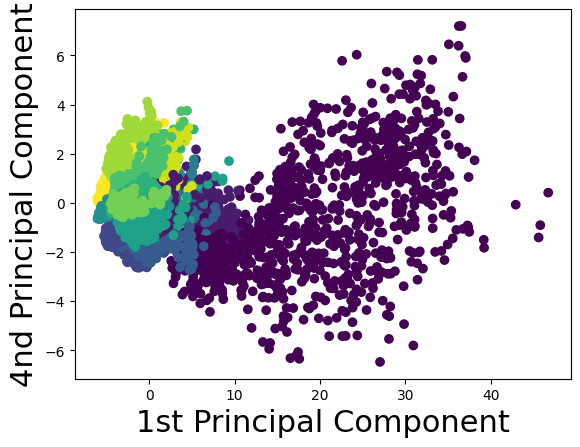

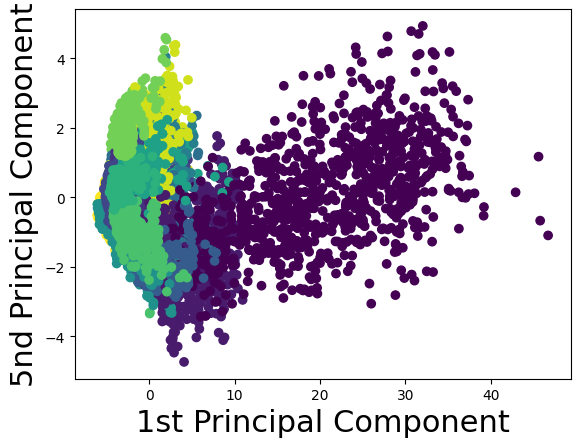

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

samples = len(result)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(result)

# Applying PCA
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:,0], data_pca[:,1], c=result['label'])
plt.xlabel("1st Principal Component", fontsize=22)
plt.ylabel("2nd Principal Component", fontsize=22)
plt.show()

plt.scatter(data_pca[:,0], data_pca[:,2], c=result['label'])

plt.xlabel("1st Principal Component", fontsize=22)
plt.ylabel("3nd Principal Component", fontsize=22)
plt.show()
plt.scatter(data_pca[:,0], data_pca[:,3], c=result['label'])

plt.xlabel("1st Principal Component", fontsize=22)
plt.ylabel("4nd Principal Component", fontsize=22)
plt.show()
plt.scatter(data_pca[:,0], data_pca[:,4], c=result['label'])

plt.xlabel("1st Principal Component", fontsize=22)
plt.ylabel("5nd Principal Component", fontsize=22)
plt.show()


LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

#data_pca_reshaped = data_pca.reshape(data_pca, -1)
# Splitting data into X (input) and y (target)
X = data_pca[:, :-1 ]
y = result['label']  # Predicting the last time step


print(len(data_pca))
print(len(result['label']))
# Splitting into training and test sets
train_size = int(0.8 * samples)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(len(X_train))


# LSTM with dropout for sequence classification in the IMDB dataset
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

model = Sequential()
model.add(LSTM(1024, input_shape=(5, 1) , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(15, activation='sigmoid'))
model.compile(loss= keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
print(model.summary())


checkpoint_filepath = '/content/drive/MyDrive/input_data/lstm-pca/cp.weights.h5'
model.load_weights(checkpoint_filepath)

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True)

model.fit(X_train, y_train, epochs=200, batch_size=64, callbacks=[model_checkpoint_callback])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

#data_pca_reshaped = data_pca.reshape(data_pca, -1)
# Splitting data into X (input) and y (target)
X = data_pca[:, :-1 ]
y = result['label']  # Predicting the last time step


print(len(data_pca))
print(len(result['label']))
# Splitting into training and test sets
train_size = int(0.8 * samples)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(len(X_train))


import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

model = Sequential()

model.add(LSTM(1024, input_shape=(5, 1) , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(15, activation='sigmoid'))
model.compile(loss= keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
print(model.summary())

checkpoint_filepath = '/content/drive/MyDrive/input_data/lstm-pca/cp.weights.h5'


model.load_weights(checkpoint_filepath)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
y_predicted = model.predict(X_test, verbose=0)

#Create confusion matrix and normalizes it over predicted (columns)
cm=confusion_matrix(y_test, y_predicted)


FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('f1 score',f1_score(y_test, y_pred, average="macro"))
print('precision' , precision_score(y_test, y_pred, average="macro"))
print('recall', recall_score(y_test, y_pred, average="macro"))


13905
13905
11124


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 5, 1024)             │       4,202,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 5, 1024)             │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 5, 1024)             │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 5, 1024)             │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_32 (LSTM)                       │ (None, 5, 1024)             │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 5, 64)               │         278,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_34 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,065,007 (145.21 MB)

 Trainable params: 38,065,007 (145.21 MB)

 Non-trainable params: 0 (0.00 B)

None


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 48 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Accuracy: 81.27%


InvalidParameterError: The 'y_true' parameter of confusion_matrix must be an array-like. Got 2472 instead.

Only LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras


X = result.loc[:, result.columns != 'label']
print(X.shape)
y = result['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_test= test_data.loc[:, result.columns != 'label']
y_test = test_data['label']



# LSTM with dropout for sequence classification in the IMDB dataset
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

model = Sequential()
model.add(LSTM(1024, input_shape=(64, 1) , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(15, activation='sigmoid'))
model.compile(loss= keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
print(model.summary())

checkpoint_filepath = '/content/drive/MyDrive/input_data/lstm/cp.weights.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=[model_checkpoint_callback])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X = result.loc[:, result.columns != 'label']
print(X.shape)
y = result['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_test= test_data.loc[:, result.columns != 'label']
y_test = test_data['label']


import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

model = Sequential()

model.add(LSTM(1024, input_shape=(64, 1) , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(15, activation='sigmoid'))
model.compile(loss= keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
print(model.summary())

checkpoint_filepath = '/content/drive/MyDrive/input_data/lstm/cp.weights.h5'


model.load_weights(checkpoint_filepath)


cm=confusion_matrix(y_test, y_predicted)

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('f1 score',f1_score(y_test, y_pred, average="macro"))
print('precision' , precision_score(y_test, y_pred, average="macro"))
print('recall', recall_score(y_test, y_pred, average="macro"))